In [2]:
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import math
from os.path import exists
sns.set()

In [3]:
if not exists("df.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv"
    ) as r, open("df.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_features = pd.read_csv("df.csv", low_memory = False)
df_features.replace({'llovieron_hamburguesas_hoy' : {'si' : 1, 'no' : 0}}, inplace = True)
df_features

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
0,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,86942,0.0,16.0,...,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,102098,0.0,2.6,...,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0
2,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,67154,0.0,2.4,...,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0
3,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,50245,0.0,NaN,...,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,82904,0.0,0.8,...,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,Villa Lugano,2011-03-07,Oestesuroeste,Sureste,11.6,35.0,44.0,118424,0.0,8.4,...,1011.9,1015.9,suroeste,43.0,28.7,17.4,27.8,23.0,30.0,11.0
116364,Saavedra,2009-07-25,Sureste,Sursureste,1.0,68.0,80.0,87436,0.0,7.4,...,1015.1,1018.2,Sureste,44.0,26.3,19.0,24.0,21.9,30.0,19.0
116365,Villa General Mitre,2013-11-11,suroeste,Sur,11.1,19.0,43.0,116306,0.0,NaN,...,1011.3,1014.4,Oestesuroeste,35.0,34.5,10.2,32.8,24.2,24.0,9.0
116366,Villa Devoto,2010-08-17,Sursuroeste,NaN,NaN,71.0,99.0,112204,0.0,NaN,...,1004.7,1005.2,Sursuroeste,43.0,16.5,5.0,13.6,11.4,26.0,0.0


In [4]:
if not exists("df_resultados.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv"
    ) as r, open("df_resultados.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_target = pd.read_csv("df_resultados.csv", low_memory=False)
df_target.replace({'llovieron_hamburguesas_al_dia_siguiente' : {'si' : 1, 'no' : 0}}, inplace = True)
df_target

,id,llovieron_hamburguesas_al_dia_siguiente
0,86942,0.0
1,102098,0.0
2,67154,0.0
3,50245,0.0
4,82904,0.0
...,...,...
116363,118424,0.0
116364,87436,1.0
116365,116306,0.0
116366,112204,1.0


In [5]:
df = df_features.merge(df_target, on = 'id')
df.set_index("id", inplace=True)
df_original = df.copy()
df

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,...,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,
86942,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,0.0,16.0,0.0,...,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,0.0
102098,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,0.0,2.6,0.0,...,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,0.0
67154,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,0.0,2.4,0.0,...,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,0.0
50245,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,0.0,NaN,0.0,...,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,0.0
82904,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,0.0,0.8,0.0,...,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118424,Villa Lugano,2011-03-07,Oestesuroeste,Sureste,11.6,35.0,44.0,0.0,8.4,0.0,...,1015.9,suroeste,43.0,28.7,17.4,27.8,23.0,30.0,11.0,0.0
87436,Saavedra,2009-07-25,Sureste,Sursureste,1.0,68.0,80.0,0.0,7.4,0.0,...,1018.2,Sureste,44.0,26.3,19.0,24.0,21.9,30.0,19.0,1.0
116306,Villa General Mitre,2013-11-11,suroeste,Sur,11.1,19.0,43.0,0.0,NaN,0.0,...,1014.4,Oestesuroeste,35.0,34.5,10.2,32.8,24.2,24.0,9.0,0.0


## ¿Hay datos faltantes? ¿Cómo se distribuyen?

### Vemos como están representados los datos faltantes

In [6]:
print(f"'-':\t{df.astype('str').eq('-').any(None)}")
print(f"' ':\t{df.astype('str').eq(' ').any(None)}")
print(f"NaN:\t{df.astype('str').eq('nan').any(None)}")

'-':	False
' ':	False
NaN:	True


### Podemos ver que aparecen como NaN. Graficamos el porcentaje de datos faltantes por feature

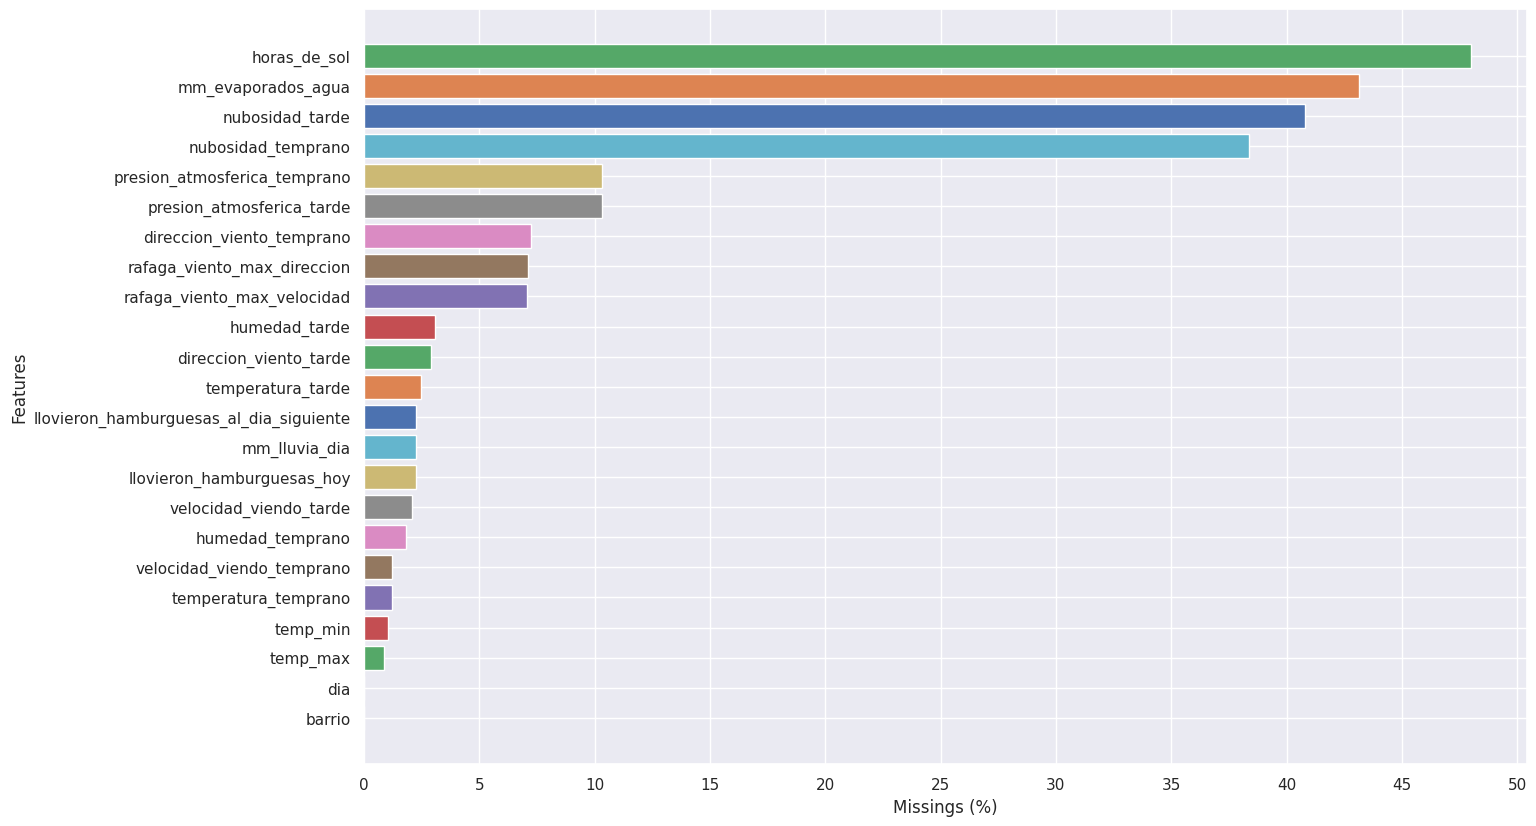

In [7]:
def plot_missings(dataframe):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_xlabel("Missings (%)")
    ax.set_ylabel("Features")
    ax.set_xticks(range(0, 61, 5))
    fig.set_dpi(100)

    features_ord = sorted(dataframe.columns, key=lambda f : len(dataframe[dataframe[f].isna()]))
    for feature in features_ord:
      cant_missings = len(dataframe[dataframe[feature].isna()]) / len(dataframe) * 100
      ax.barh(feature, cant_missings)


plot_missings(df)

El gráfico representa el porcentaje de filas con datos faltantes por columna.
Podemos ver en el gráfico que en las columnas de día y barrio no hay ningún dato faltante. La mayoría de estos se encuentran en las columnas de *horas_de_sol*, *mm_evaporados_agua*, *nubosidad_tarde* y *nubosidad_temprano*

## Que rows con datos faltantes podemos dropear sin perder muchos datos?

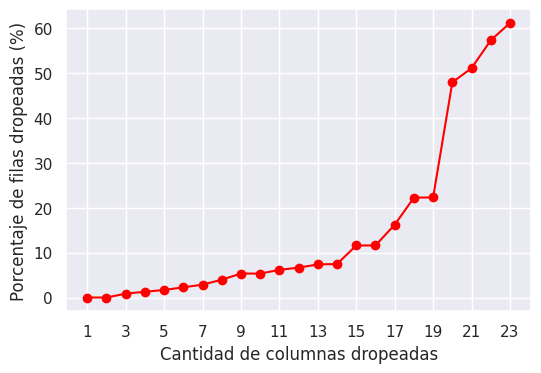

In [8]:
x = range(1, len(df.columns) + 1)
y = []

features_ord = sorted(df.columns, key=lambda f : len(df[df[f].isna()]))
for i in x:
    df_drop = df_original.loc[df_original[features_ord[:i]].dropna().index]
    y.append((1 - len(df_drop)/len(df_original))*100)

plt.figure(dpi=100)
plt.ylabel("Porcentaje de filas dropeadas (%)")
plt.xlabel("Cantidad de columnas dropeadas")
plt.plot(x, y, "o-", color = 'red')
plt.xticks(x[::2])
plt.show()

Este gráfico representa el porcentaje de samples que perdemos del total al dropear las últimas $n$ features con menos datos faltantes del dataset.
Decidimos dropear los samples con NaN de las 16 features con menos porcentaje de datos faltantes.

Porcentaje de samples perdidos:  11.60%


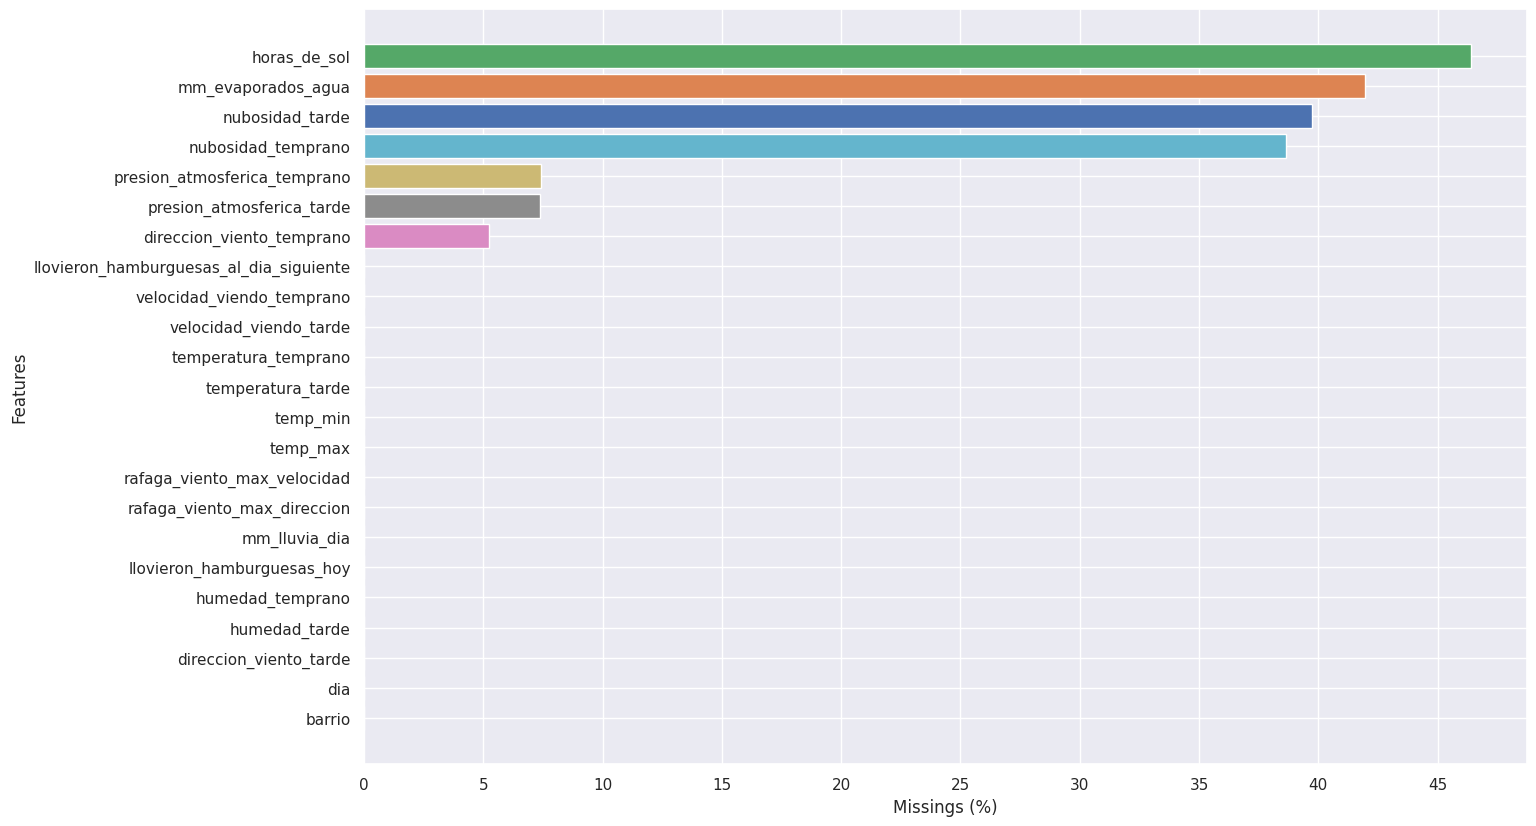

In [9]:
print(f"Porcentaje de samples perdidos: {y[15] : .2f}%")
df = df_original.loc[df_original[features_ord[:16]].dropna().index]
plot_missings(df)

## Como se relacionan los datos faltantes restantes?

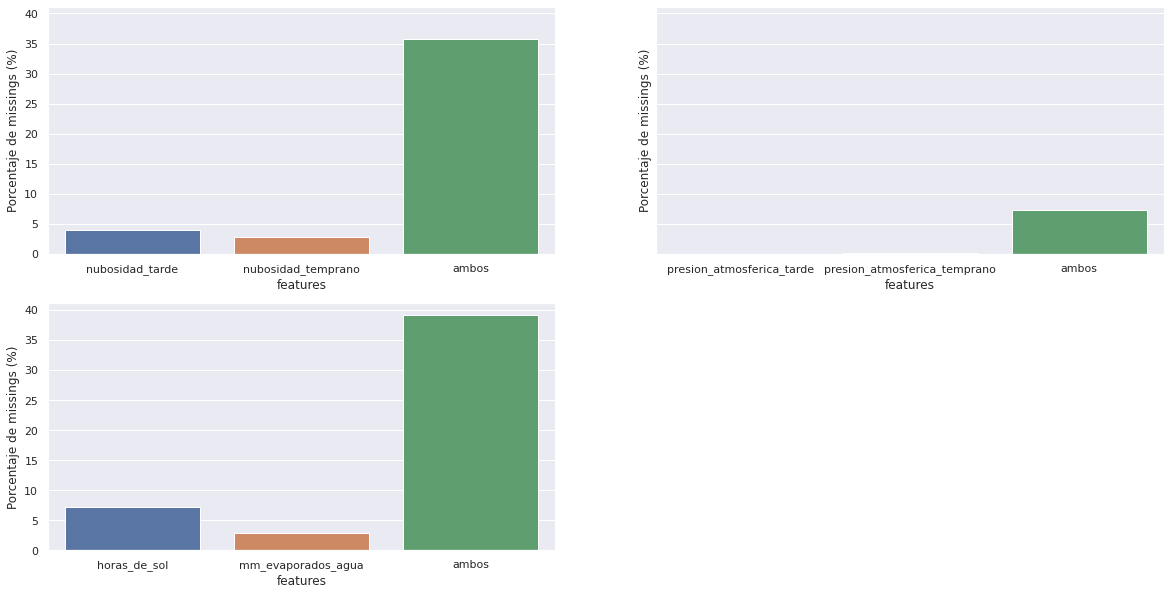

In [10]:
def mostrar_relacion_faltantes(ax, feature1, feature2):
  faltan_en_uno = len(df[df[feature1].isna()]) / len(df) * 100
  faltan_en_otro = len(df[df[feature2].isna()]) / len(df) * 100
  faltan_en_ambos = len(df[df[feature1].isna() & df[feature2].isna()]) / len(df) * 100
  y = [faltan_en_uno - faltan_en_ambos, faltan_en_otro - faltan_en_ambos, faltan_en_ambos]
  x = [feature1, feature2, "ambos"]
  sns.barplot(
      ax=ax,
      x=x,
      y=y
  )

pares_features = [("nubosidad_tarde", "nubosidad_temprano"), ("presion_atmosferica_tarde", "presion_atmosferica_temprano"),
                  ("horas_de_sol", "mm_evaporados_agua")]

fig, axs = plt.subplots(2,2, sharey=True, figsize=(20,10))

for ax,par_feature in zip(axs.flat, pares_features):
  mostrar_relacion_faltantes(ax, par_feature[0], par_feature[1])
  ax.set_ylabel("Porcentaje de missings (%)")
  ax.set_xlabel("features")

axs.flat[-1].axis("off")
plt.show()

En estos gráficos podemos notar que cuando faltan datos en la feature *nubosidad_tarde*, es probable que también falten en *nubosidad_temprano*. Lo mismo sucede con *horas_de_sol* y *mm_evaporados_agua*.
Para el caso de *presion_atmosferica_tarde* y *presion_atmosferica_temprano*, siempre que falta un dato en uno falta también en el otro (para este dataset ya filtrado).

Parece ser un caso de Missing At Random (MAR, no MCAR) ya que hay una cierta relación entre las features en las que faltan datos de una misma fila.

Vamos a dejar los NaN de estas columnas como un valor posible más.

## ¿Cómo se reparten los outliers de las features numéricas?

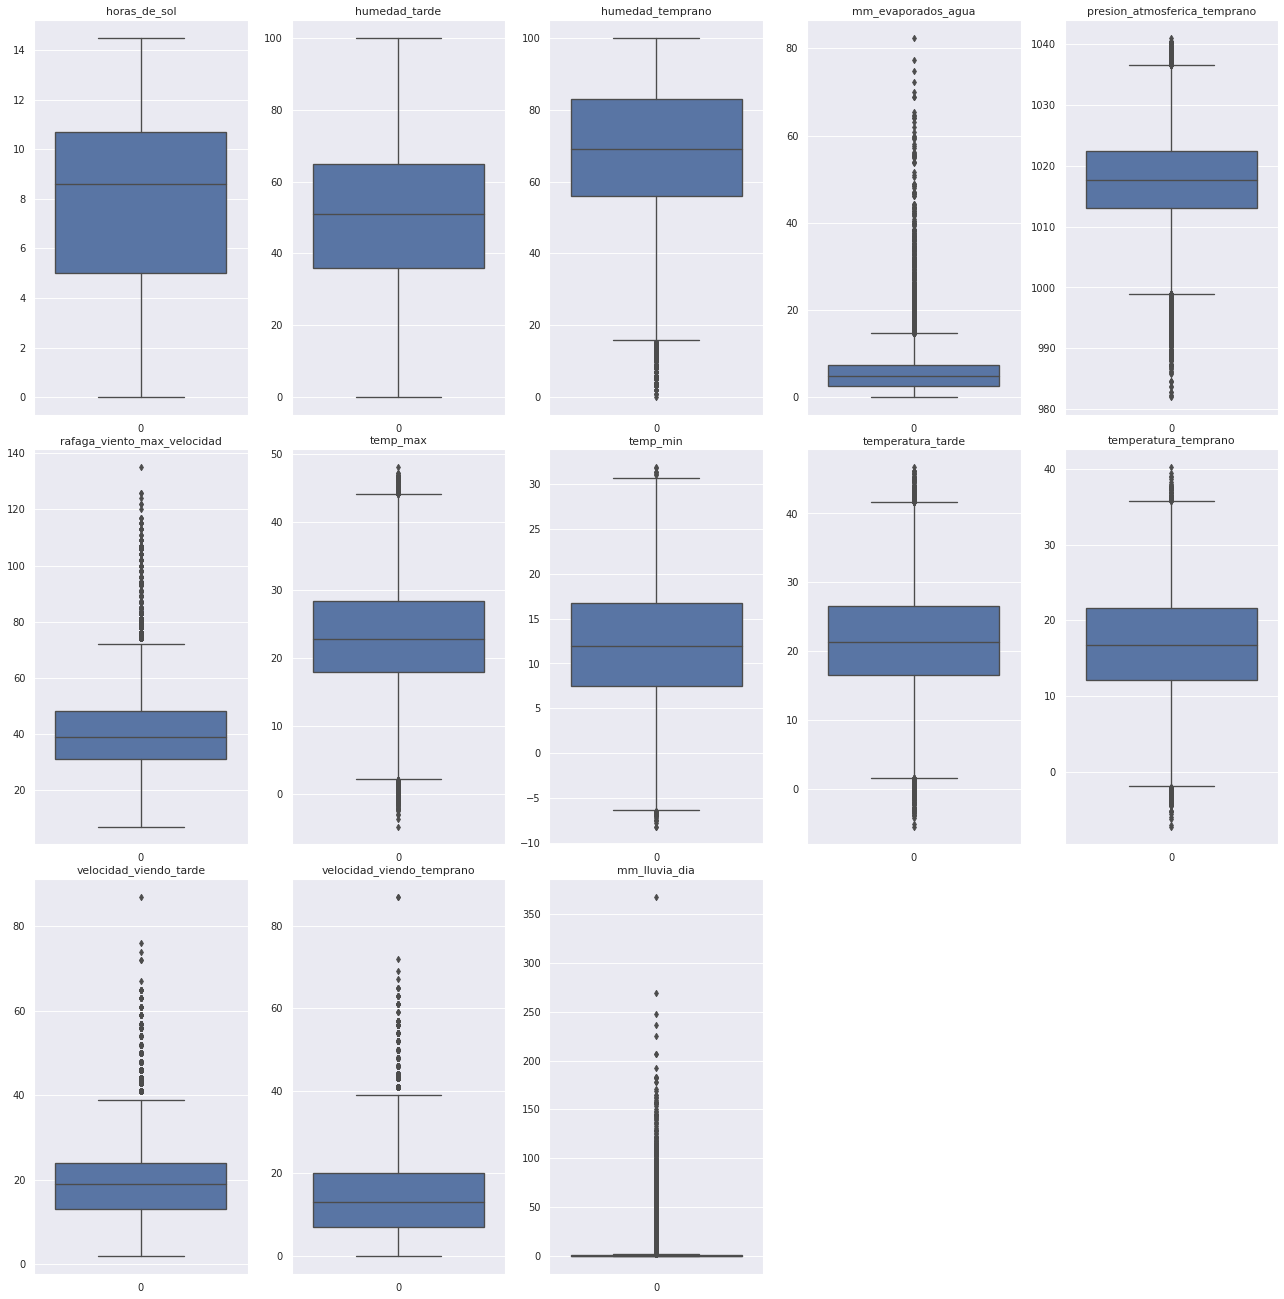

In [11]:
features_num = [
    'horas_de_sol',
    'humedad_tarde',
    'humedad_temprano',
    'mm_evaporados_agua',
    'presion_atmosferica_temprano',
    'rafaga_viento_max_velocidad',
    'temp_max',
    'temp_min',
    'temperatura_tarde',
    'temperatura_temprano',
    'velocidad_viendo_tarde',
    'velocidad_viendo_temprano',
    'mm_lluvia_dia'
]

fig, axs = plt.subplots((len(features_num) + 4)//5, 5, figsize=(20,20))
fig.set_dpi(65)
plt.tight_layout()

for ax, feature in zip(axs.flat, features_num):
  ax.set_title(feature)
  sns.boxplot(
      data=df[feature],
      ax=ax,
  ).set(xlabel="", ylabel="")
    
for ax in axs.flat[len(features_num):]:
    ax.axis("off")
plt.show()

Datos perdidos respecto a DataFrame ya reducido:  3.20%
Datos perdidos respecto a DataFrame original:  14.43%


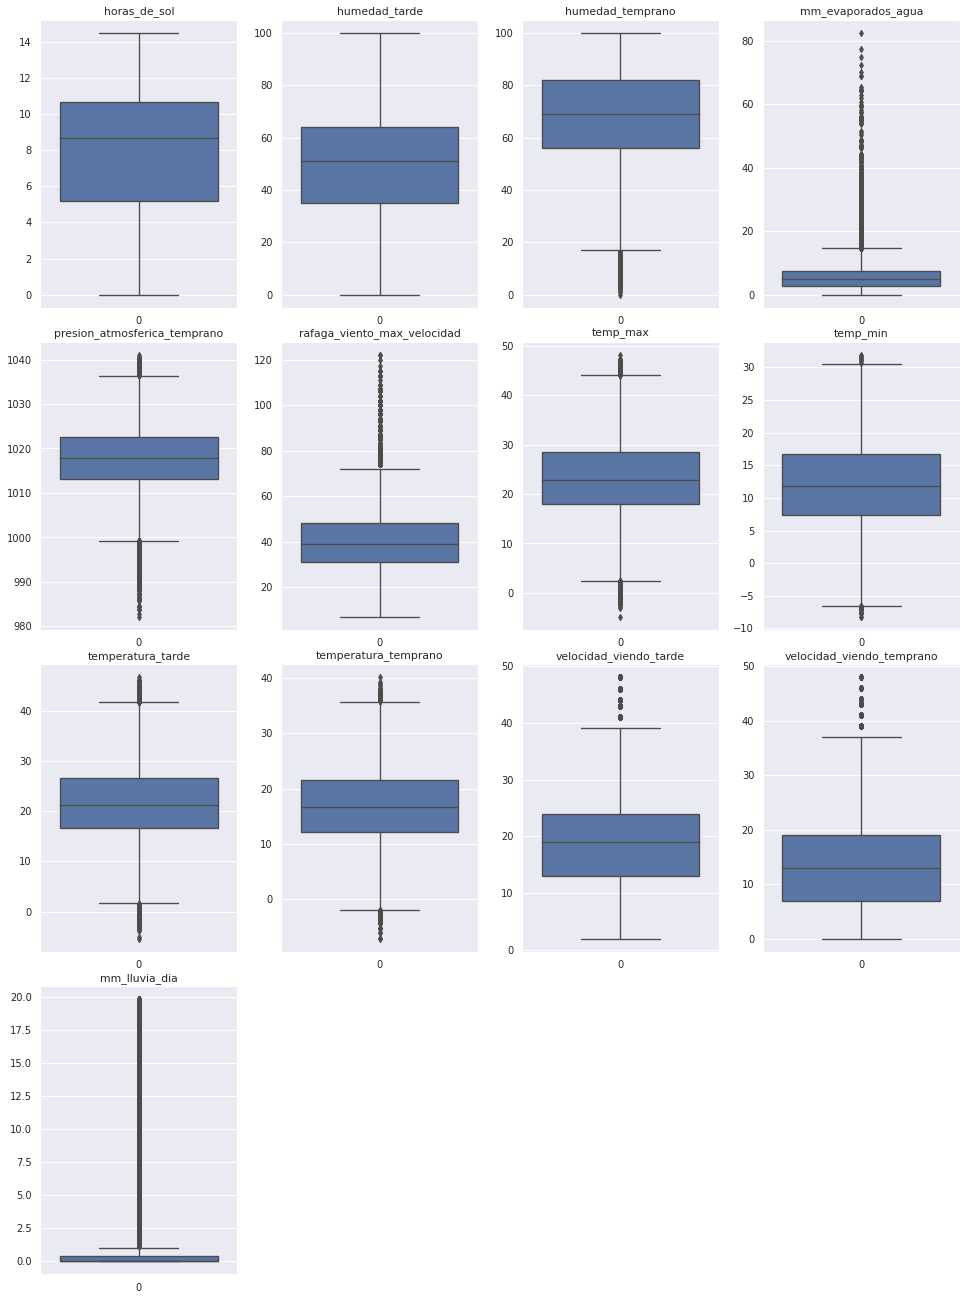

In [12]:
df_graf = df[
    #(df.humedad_temprano > 18) &
    #(df.mm_evaporados_agua < 14) &
    #(df.presion_atmosferica_temprano > 1000) & (df.presion_atmosferica_temprano < 1035) &
    #(df.rafaga_viento_max_velocidad < 75) &
    #(df.temp_max < 45) & (df.temp_max > 0) &
    #(df.temp_min > -6) & (df.temp_min < 30) &
    #(df.temperatura_tarde > 2) & (df.temperatura_tarde < 40) &
    #(df.temperatura_temprano < 35) & (df.temperatura_temprano > -1) &
    (df.velocidad_viendo_tarde < 50) &
    (df.velocidad_viendo_temprano < 50) &
    (df.mm_lluvia_dia < 20)
]
print(f"Datos perdidos respecto a DataFrame ya reducido: {100 - (len(df_graf)*100/len(df)) : .2f}%")
print(f"Datos perdidos respecto a DataFrame original: {100 - (len(df_graf)*100/len(df_original)) : .2f}%")

fig, axs = plt.subplots((len(features_num) + 3)//4, 4, figsize=(15,20))
fig.set_dpi(65)
plt.tight_layout()
for ax, feature in zip(axs.flat, features_num):
    sns.boxplot(
        data=df_graf[feature],
        ax=ax
    )
    ax.set_title(feature)

for ax in axs.flat[len(features_num):]:
    ax.axis("off")
plt.show()

## ¿Cómo varían las distintas features cuando llueven hamburguesas al día siguiente?

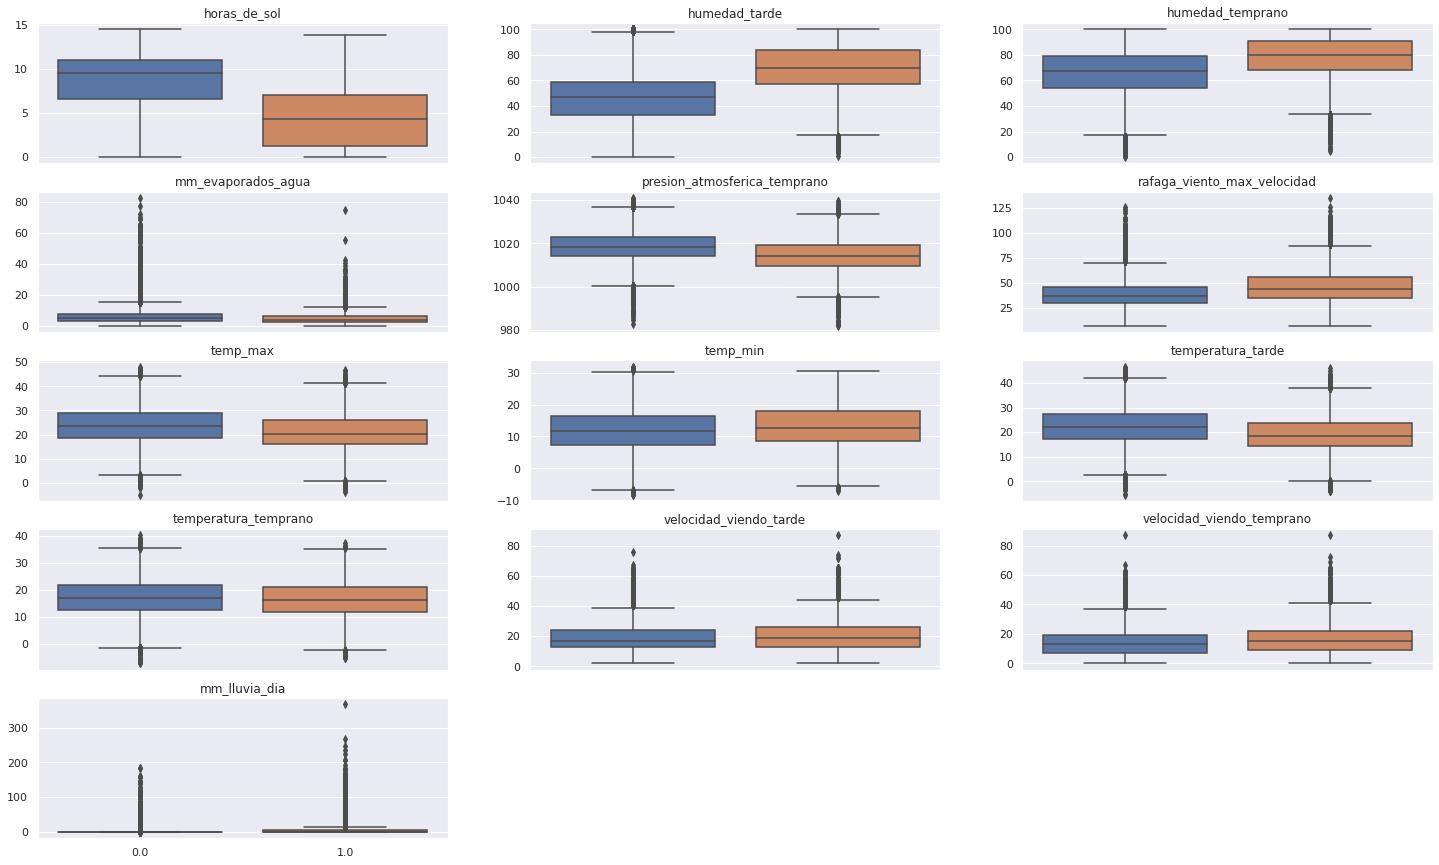

In [82]:
fig, axs = plt.subplots((len(features_num) + 2)//3, 3, sharex=True, figsize=(25,15))
#fig.set_dpi(50)

for ax, feature in zip(axs.flat, features_num):
      ax.set_title(feature)
      sns.boxplot(
              ax=ax,
              x="llovieron_hamburguesas_al_dia_siguiente",
              y=feature,
              data=df,
      ).set(
              xlabel="",
              ylabel=""\
      )

for ax in axs.flat[len(features_num):]:
    ax.axis("off")
plt.show()

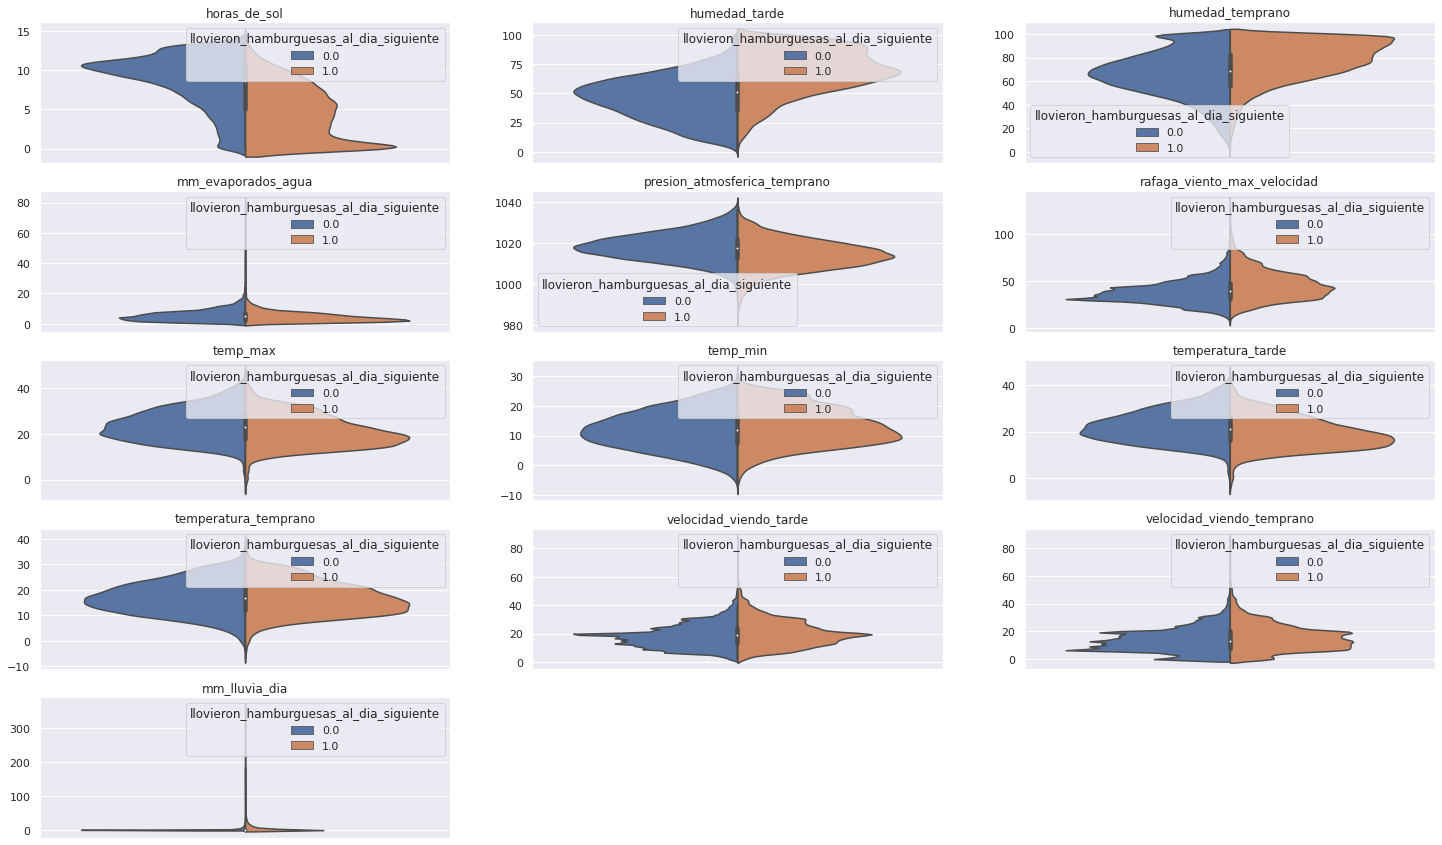

In [83]:
fig, axs = plt.subplots((len(features_num) + 2)//3, 3, sharex=True, figsize=(25,15))
#fig.set_dpi(50)

#Otra alternativa, las conclusiones no son tan claras
df["all"] = ""
for ax, feature in zip(axs.flat, features_num):
      ax.set_title(feature)
      sns.violinplot(
              ax=ax,
              x="all",
              hue="llovieron_hamburguesas_al_dia_siguiente",
              y=feature,
              data=df,
              #palette="muted",
              split=True\
      ).set(
              xlabel="",
              ylabel=""\
      )

for ax in axs.flat[len(features_num):]:
    ax.axis("off")
plt.show()

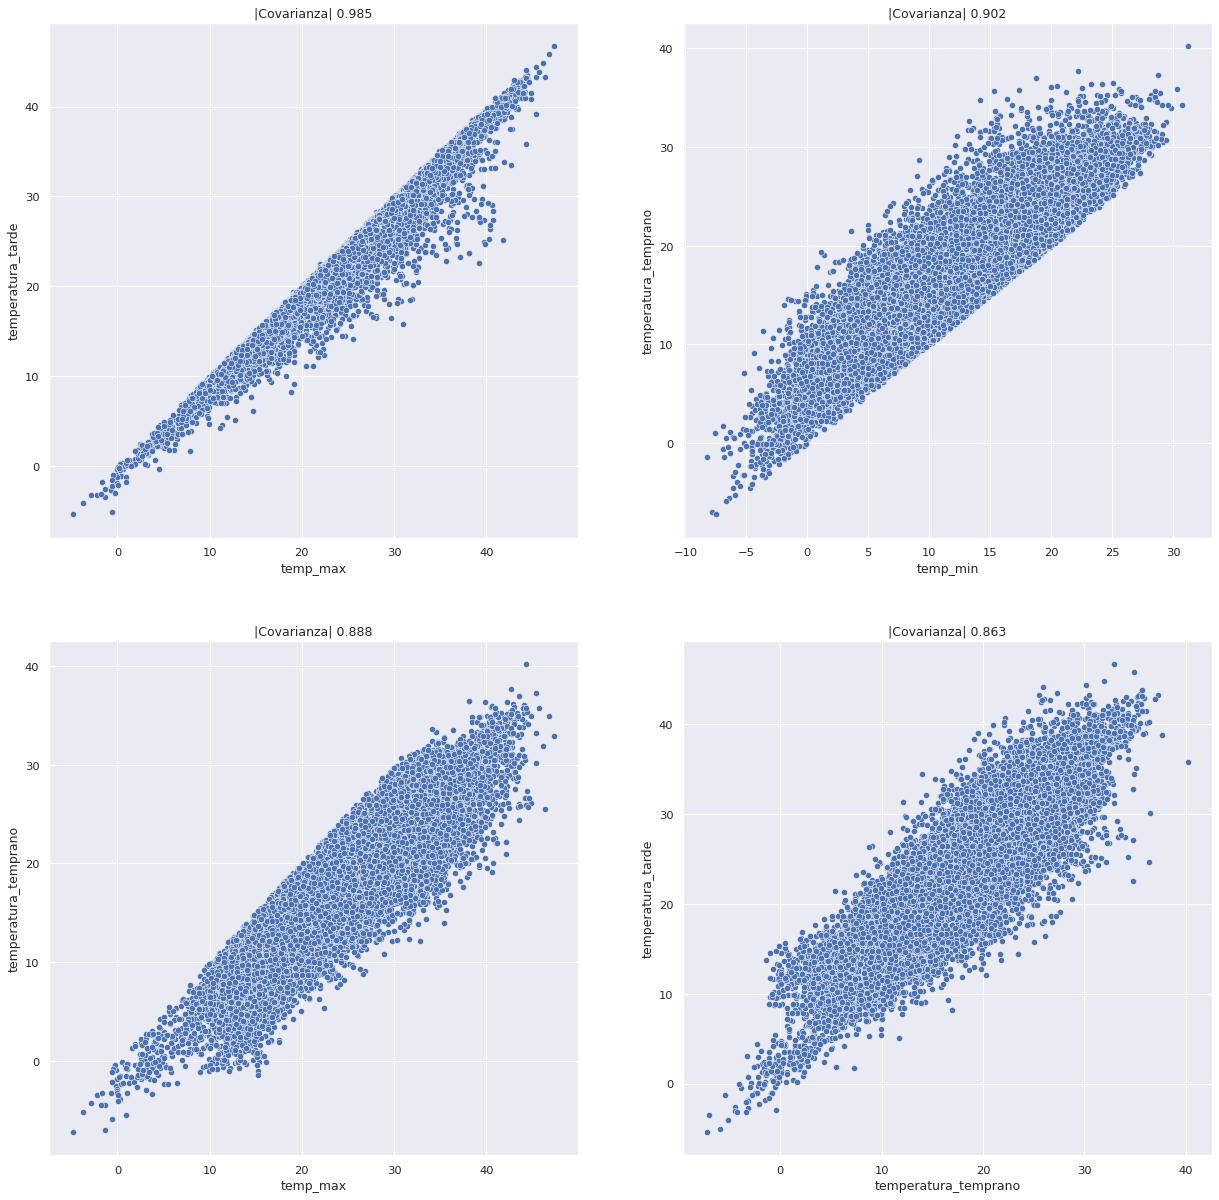

In [80]:
pares_ord_cov = df.corr().abs().unstack().sort_values(ascending=False)
pares_ord_cov = pares_ord_cov[pares_ord_cov < 1] #Salteo diagonal

#Para evitar duplicados, por ej (temp_min, temp_max) y (temp_max, temp_min)
dic_cov = {}
for par_ord in dict(pares_ord_cov):
    dic_cov.setdefault(pares_ord_cov[par_ord], par_ord)
    if len(dic_cov) == 4:
        break
    
fig, axs = plt.subplots(2, 2, figsize=(20,20))

fig.set_dpi(75)
for cov, ax in zip(dic_cov, axs.flat):
    ax.set_title(f"|Covarianza| {cov:.3f}")
    sns.scatterplot(
        x=dic_cov[cov][0],
        y=dic_cov[cov][1],
        #hue="llovieron_hamburguesas_al_dia_siguiente",
        data=df.sample(30000, random_state=0),
        ax=ax,
    )

In [ ]:
#Nota: Casi siempre la temperatura maxima se da a la tarde, asi que podemos descartar una de las dos variables porque dan la misma info
#Lo mismo con temp_min y temperatura_temprano, pero no tanto

In [14]:
# Probar: Scatter plot con los 2 de humedad + color segun si llovio hamburguesas
# presión atmosférica tarde y temprano